## Wine Quality 분석
- 머신러닝 과제 2024/02/26
- 데이터 출처 : https://archive.ics.uci.edu/dataset/186/wine+quality

In [34]:
import pandas as pd

(1) 모듈 준비 & 데이터 준비

In [35]:
filename = './winequality-white.csv'
wineDF = pd.read_csv(filename, delimiter=';')
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [36]:
wineDF.columns, len(wineDF.columns)

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'),
 12)

In [37]:
# 'quality' 속성과 다른 속성들 간의 상관계수 출력
wineDF.corr().iloc[:, [-1]].sort_values(by='quality')

,quality
density,-0.307123
chlorides,-0.209934
volatile acidity,-0.194723
total sulfur dioxide,-0.174737
fixed acidity,-0.113663
residual sugar,-0.097577
citric acid,-0.009209
free sulfur dioxide,0.008158
sulphates,0.053678
pH,0.099427


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [38]:
col1, col2 = 8, 10
wineDF2 = wineDF.iloc[:, [col1, col2, -1]]
wineDF2

,pH,alcohol,quality
0,3.00,8.8,6
1,3.30,9.5,6
2,3.26,10.1,6
3,3.19,9.9,6
4,3.19,9.9,6
...,...,...,...
4893,3.27,11.2,6
4894,3.15,9.6,5
4895,2.99,9.4,6
4896,3.34,12.8,7


In [39]:
wineDF2.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [40]:
wineDF2.info()  # 모두 숫자형, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pH       4898 non-null   float64
 1   alcohol  4898 non-null   float64
 2   quality  4898 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 114.9 KB


In [41]:
wineDF2.describe()  # 최소, 최대값, 평균 등등 확인

,pH,alcohol,quality
count,4898.000000,4898.000000,4898.000000
mean,3.188267,10.514267,5.877909
std,0.151001,1.230621,0.885639
min,2.720000,8.000000,3.000000
25%,3.090000,9.500000,5.000000
50%,3.180000,10.400000,6.000000
75%,3.280000,11.400000,6.000000
max,3.820000,14.200000,9.000000


(3) 기계학습 데이터 분리

(3-1) 피쳐와 타겟 분리

In [42]:
featureDF = wineDF2[wineDF2.columns[:-1]]
featureDF.head(3)

,pH,alcohol
0,3.00,8.8
1,3.30,9.5
2,3.26,10.1


In [43]:
targetDF = wineDF2['quality']
targetDF.head(3)

0    6
1    6
2    6
Name: quality, dtype: int64

(3-2) 학습/테스트 데이터셋 분리
- 학습 : 테스트 = 80 : 20

In [44]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF)

In [46]:
# 학습 및 테스트 데이터셋 확인
# stratify 설정을 했기 때문에 train, test 각각 quality 별 분포가 균등하게 나뉘었음을 확인할 수 있다.
print(f'학습용 데이터셋 ---> \n{x_train.shape}, {y_train.shape}')
print(f'{y_train.value_counts()/y_train.shape[0]}\n')
print(f'테스트용 데이터셋 ---> \n{x_test.shape}, {y_test.shape}')
print(f'{y_test.value_counts()/y_test.shape[0]}\n')

학습용 데이터셋 ---> 
(3918, 2), (3918,)
quality
6    0.448698
5    0.297601
7    0.179684
8    0.035733
4    0.033180
3    0.004084
9    0.001021
Name: count, dtype: float64

테스트용 데이터셋 ---> 
(980, 2), (980,)
quality
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: count, dtype: float64


(3-3) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [47]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [48]:
scaler = StandardScaler()   # 스케일러 객체 생성

In [49]:
scaler.fit(x_train)         # 데이터에 대한 학습 평균, 표준편차 계산 진행

StandardScaler()

In [50]:
# 뒤에 _가 붙어있는 속성들은 학습이 끝난 뒤에만 확인할 수 있다.
# 모델 파라미터 -> 모델 학습이 끝난 후 확인 가능
scaler.mean_

array([ 3.18815212, 10.51891186])

In [51]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(3918, 2)

In [52]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(980, 2)

(3-4) 데이터 시각화

In [53]:
import matplotlib.pyplot as plt

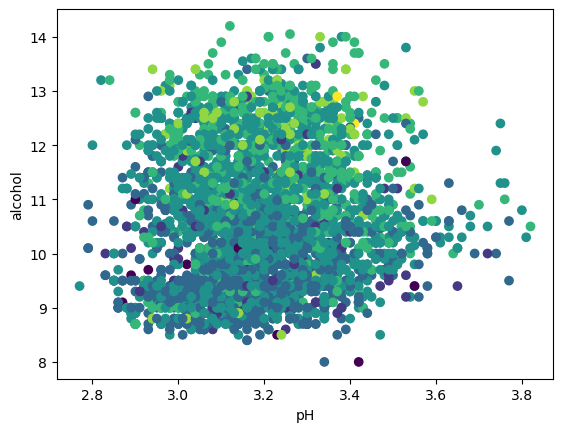

In [54]:
# 원본 데이터 시각화
plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.show()

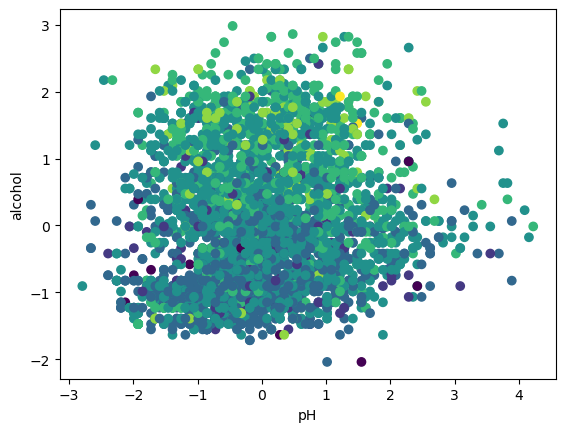

In [55]:
# 스케일된 데이터 시각화
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.show()


(4) 학습 진행

In [56]:
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

In [57]:
# KNN 알고리즘
max_k = scaled_x_train.shape[0]
train_scoreList = []
test_scoreList = []

for k in range(1, max_k+1 if max_k < 100 else 100):
    # K값을 바꿔가며 모델의 성능을 저장한다.
    wineModel = KNeighborsClassifier(n_neighbors=k)
    wineModel.fit(scaled_x_train, y_train)
    train_scoreList.append(wineModel.score(scaled_x_train, y_train))
    test_scoreList.append(wineModel.score(scaled_x_test, y_test))

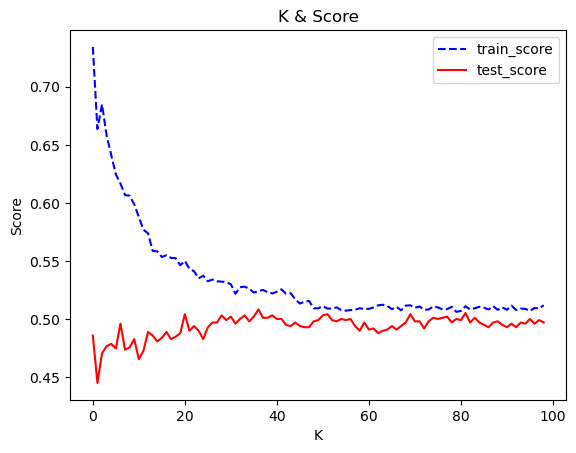

In [58]:
# K 개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='train_score')
plt.plot(test_scoreList, 'r-', label='test_score')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [59]:
THE_K = test_scoreList.index(max(test_scoreList)) + 1
THE_K   # 가장 성능 좋은 K값

37

In [60]:
max(test_scoreList)

0.5081632653061224

(5) 테스트 진행

In [61]:
wineModel = KNeighborsClassifier(n_neighbors=THE_K)
wineModel.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [62]:
wineModel.score(scaled_x_test, y_test)

0.5081632653061224

(6) 예측

In [63]:
## 생선 무게, 길이 입력받은 후 결과 반환
x1, x2 = input(f'{x_train.columns[0]}, {x_train.columns[1]} 입력(예: 90, 20) : ').split(',')

In [64]:
new_data = pd.DataFrame([[x1, x2]], columns = x_train.columns[:2])
new_data

,pH,alcohol
0,5,10


In [65]:
# 피쳐 스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [66]:
# 예측
y_pred = wineModel.predict(scaled_new_data)
y_pred  # [5] => 5등급

array([6], dtype=int64)